# About the Data

* The data was taken from 
the csv file complaints.csv


* The complaints are for the products:<br>

  1. Banking Services
  2. Card Services
  3. Credit Reporting
  4. Debt Collection
  5. Loans
  6. Mortgage

* The sample data has 60000 entries. Each of the products Banking Services, Card Services, Credit Reporting , Debt Collection, Loans and Mortgage has 10000 entries in the sample data.

* The stop words are removed using gensim library.


#Fine Tuning DistilBERT model for text classification

* The model was trained on 5 epochs and the learning rate was set at 1e-5 and batch size 32

* Total training time taken across all epochs [Validation and model saving time included]: 1:47:30 (h:mm:ss)

* Data Split:<br>
      -Training data: 48000 (80 percent)
      -Validation data: 6000 (10 percent)
      -Test Data :  6000 (10 percent)

* F1-score<br>
      -Training data: 0.88
      -Validation data: 0.84

* Fine-tuning was done on the sample data of 60000 entries

## Next Steps

* Calculate Metrics on the test Data Set 





##Google Drive access

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# write the appropriate paths to retrieve the data and store results 
saved_path = '/content/drive/MyDrive/EY_Internship/Consumer_Complaints/Without_Stopwords/'
sample_data_path = saved_path + 'data_sample_balanced.csv'
used_test_data_path = saved_path + 'Test_data_DistilBERT.csv'
encoded_test_data_path = saved_path + 'ENCODED_Test_data_DistilBERT.csv'
label2id_df_path = saved_path + 'label2id_df.csv'

## Set-up environment

Install the libraries HuggingFace Transformers and Datasets

In [3]:
#Install the package folium version 0.2.1 and HuggingFace tranformer and datasets libraries  
!pip install folium==0.2.1 -q
!pip install -q transformers datasets 

     |████████████████████████████████| 69 kB 4.7 MB/s 
     |████████████████████████████████| 4.2 MB 8.8 MB/s 
     |████████████████████████████████| 346 kB 57.0 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 596 kB 56.6 MB/s 
     |████████████████████████████████| 6.6 MB 31.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.8 MB/s 
     |████████████████████████████████| 212 kB 62.7 MB/s 
     |████████████████████████████████| 140 kB 60.0 MB/s 
     |████████████████████████████████| 127 kB 59.3 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 50.8 MB/s 
     |████████████████████████████████| 144 kB 60.4 MB/s 


In [4]:
import torch
#Check if GPU is available
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device, "is available")

cuda:0 is available


In [5]:
!nvidia-smi -q


==============NVSMI LOG==============

Timestamp                                 : Sun May 29 22:28:39 2022
Driver Version                            : 460.32.03
CUDA Version                              : 11.2

Attached GPUs                             : 1
GPU 00000000:00:04.0
    Product Name                          : Tesla P100-PCIE-16GB
    Product Brand                         : Tesla
    Display Mode                          : Enabled
    Display Active                        : Disabled
    Persistence Mode                      : Disabled
    MIG Mode
        Current                           : N/A
        Pending                           : N/A
    Accounting Mode                       : Disabled
    Accounting Mode Buffer Size           : 4000
    Driver Model
        Current                           : N/A
        Pending                           : N/A
    Serial Number                         : 0324317003917
    GPU UUID                              : GPU-fe947ac5-3827-fd9

In [6]:
!nvidia-smi

Sun May 29 22:28:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [8]:
!free -h --si | awk  '/Mem:/{print $2}'

26G


# Loading the dataset

In [9]:
#Load the data
import pandas as pd

sample_df = pd.read_csv(sample_data_path)
#Display the first five rows in sample_df
sample_df.head()


,preprocessed_text,original_index,product,complaint,original_product,split_words_whitespaces,number_of_words,number_of_characters,number_of_unique_words,number_of_alphabets,...,number_of_character_X,number_of_character_x,percentage_of_alphabets,percentage_of_numerical_values,percentage_of_white_spaces,percentage_of_other_characters,percentage_of_character_X,percentage_of_character_x,product_instance_length,product_unique_instance_length
0,checking account jp morgan chase manipulated y...,1546330,Banking Services,My checking account with JP Morgan Chase has b...,Bank account or service,"['checking', 'account', 'jp', 'morgan', 'chase...",70,528,44,459,...,0,1,0.869318,0.0,0.130682,0.0,0.0,0.001894,1,1
1,went atm chase bank ny withdrawal making withd...,1653179,Banking Services,"On XX/XX/2016, I went to an ATM at the Chase B...",Bank account or service,"['went', 'atm', 'chase', 'bank', 'ny', 'withdr...",40,264,32,225,...,0,0,0.852273,0.0,0.147727,0.0,0.0,0.000000,1,1
2,bank allowed fraudulent checks deposited withd...,498889,Banking Services,My bank allowed fraudulent checks to be deposi...,Checking or savings account,"['bank', 'allowed', 'fraudulent', 'checks', 'd...",53,357,45,305,...,0,1,0.854342,0.0,0.145658,0.0,0.0,0.002801,1,1
3,man called usaa banking services pretending nt...,1612147,Banking Services,A man called USAA Banking services pretending ...,Bank account or service,"['man', 'called', 'usaa', 'banking', 'services...",77,550,52,474,...,0,0,0.861818,0.0,0.138182,0.0,0.0,0.000000,1,1
4,problems bank capitalone months answer records...,114348,Banking Services,I have had problems with the bank - CapitalOne...,Checking or savings account,"['problems', 'bank', 'capitalone', 'months', '...",81,604,68,524,...,0,1,0.867550,0.0,0.132450,0.0,0.0,0.001656,1,1


In [10]:
#Create dataframe data with the columns 'preprocessed_text' and 'product' from sample_df
data = sample_df[['preprocessed_text', 'product']].copy()
#Rename the columns 'preprocessed_text' as 'setence' and 'product' as 'label'
data.rename(columns = {'preprocessed_text':'sentence', 'product':'label'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  60000 non-null  object
 1   label     60000 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB


In [11]:
# Print the counts of unique values in 'label' in data
data['label'].value_counts()

Banking Services    10000
Card Services       10000
Credit Reporting    10000
Debt Collection     10000
Loans               10000
Mortgage            10000
Name: label, dtype: int64

In [12]:
#Convert the Data into HuggingFace Dataset
from datasets import Dataset
dataset = Dataset.from_pandas(data)
dataset


Dataset({
    features: ['sentence', 'label'],
    num_rows: 60000
})

The dataset has to be split into training, validation and test set. Let's check the first example of the dataset:



In [13]:
example = dataset[0]
example

{'label': 'Banking Services',
 'sentence': 'checking account jp morgan chase manipulated years account balance pending ach transactions account balance pending check payment ach transaction paid left balance showing balance account alert account said overdrawn ach transactions cleared day suddenly reappeared day triggering negative balance incurred overdrawn fee chase manipulated account check came erasing balance subbatch transaction high low maximize fee transaction showing came justify fee erispective posted fed big banks manipulation customers carry huge balance'}

In [14]:
example['label']

'Banking Services'

In [15]:
example['sentence']

'checking account jp morgan chase manipulated years account balance pending ach transactions account balance pending check payment ach transaction paid left balance showing balance account alert account said overdrawn ach transactions cleared day suddenly reappeared day triggering negative balance incurred overdrawn fee chase manipulated account check came erasing balance subbatch transaction high low maximize fee transaction showing came justify fee erispective posted fed big banks manipulation customers carry huge balance'

Let's look at the features of the dataset

In [16]:
dataset.features

{'label': Value(dtype='string', id=None),
 'sentence': Value(dtype='string', id=None)}

Let's create a list that contains the labels, as well as 2 dictionaries that map labels to integers and back.

In [17]:
labels = sorted(list(set(dataset['label'])))
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['Banking Services',
 'Card Services',
 'Credit Reporting',
 'Debt Collection',
 'Loans',
 'Mortgage']

In [18]:
len(labels)

6

The dataset consists of 6 labels.

## Splitting the Data into Train, Validation and Test set






In [19]:
fix_seed = 42
from sklearn.model_selection import train_test_split

In [20]:
# Split data into train and val_test set with 80 percent of data in train and 20 perecent in val_test
X= dataset['sentence']
y= dataset['label']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2,stratify=y ,random_state=fix_seed)

In [21]:
# Split data into test and validation set with 10 percent data in val and 10 percent in test
X_val, X_test,y_val, y_test = train_test_split(X_val_test, y_val_test,stratify = y_val_test, test_size = 0.5, random_state=fix_seed)

In [22]:
# Create the HuggingFace Dataset train_data 
dict_train = {"sentence": X_train,"label":y_train}
train_data = Dataset.from_dict(dict_train)
train_data

Dataset({
    features: ['sentence', 'label'],
    num_rows: 48000
})

In [23]:

# Create the HuggingFace Dataset val_data
dict_val = {"sentence": X_val,"label":y_val}
val_data = Dataset.from_dict(dict_val)
val_data

Dataset({
    features: ['sentence', 'label'],
    num_rows: 6000
})

In [24]:
# Create the HuggingFace Dataset test_data
dict_test = {"sentence": X_test,"label":y_test}
test_data = Dataset.from_dict(dict_test)
test_data

Dataset({
    features: ['sentence', 'label'],
    num_rows: 6000
})

Let's Check the Frequency Count of Train, Validation and Test label data

In [25]:
import collections 
#Define the function to check the frequency count of elements in the list
def frequency_count(mylist):
  frequency = collections.Counter(mylist)
  [print(key,':',value) for key, value in frequency.items()]

In [26]:
#print the frequency count of label in train_data
print("The Frequency of label in train_data : \n")
frequency_count(train_data['label'])

The Frequency of label in train_data : 

Loans : 8000
Debt Collection : 8000
Card Services : 8000
Credit Reporting : 8000
Banking Services : 8000
Mortgage : 8000


In [27]:
#print the frequency count of label in val_data
print("The Frequency of label in val_data : \n")
frequency_count(val_data['label'])

The Frequency of label in val_data : 

Loans : 1000
Debt Collection : 1000
Card Services : 1000
Mortgage : 1000
Banking Services : 1000
Credit Reporting : 1000


In [28]:
#print the frequency count of label in test_data
print("The Frequency of label in test_data : \n")
frequency_count(test_data['label'])

The Frequency of label in test_data : 

Credit Reporting : 1000
Banking Services : 1000
Loans : 1000
Card Services : 1000
Debt Collection : 1000
Mortgage : 1000


In [29]:
#Create dataset_clean to store the train_data, val_data and test_data
from datasets.dataset_dict import DatasetDict
dataset_clean = DatasetDict({
    'train': train_data,
    'validation': val_data,
    'test': test_data
})
dataset_clean

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 48000
    })
    validation: Dataset({
        features: ['sentence', 'label'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 6000
    })
})

## Preprocess data


Since the model don't expect text as direct input, but rather `input_ids`, etc., we tokenize the text using the tokenizer. Here I'm using the `AutoTokenizer` API, which will automatically load the appropriate tokenizer based on the checkpoint on the hub.

In [30]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased',num_labels=len(labels))

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [31]:
import numpy as np
def preprocess_data(examples):
  # take a batch of texts
  text = examples["sentence"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True)
  # add labels
  encoding["labels"] = [label2id[i] for i in examples["label"]]
  return encoding

In [32]:
encoded_dataset = dataset_clean.map(preprocess_data, batched=True, remove_columns = ['sentence', 'label'])

  0%|          | 0/48 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

In [33]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'attention_mask', 'labels'])


In [34]:
tokenizer.decode(example['input_ids'])

'[CLS] federally protected consumer debtsy violated provision usc review attached documentation [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [35]:
example['labels']

4

In [36]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 48000
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6000
    })
})

Set the format of encoded_dataset to PyTorch tensors. This will turn the training, validation and test sets into standard PyTorch [datasets]

In [37]:
encoded_dataset.set_format("torch")

## Define model

Define a model that includes a pre-trained base (i.e. the weights from the distilbert-base-uncased) which is loaded, with a random initialized classification head (linear layer) on top. Fine-tune this head, together with the pre-trained base on a labeled dataset. Set the id2label and label2id mappings to make sure the output layer has `len(labels)` output neurons.

In [38]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

## Train the model!

We are going to train the model using native Pytorch. This requires us to define 2 things: 

* `DataLoader`:Create a DataLoader for your training, validation and test datasets so you can iterate over batches of data.
* `Optimizer`
* `Learning rate scheduler`



In [39]:
fixed_batch_size = 32
fixed_learning_rate = 1e-5
num_epochs = 5

Use the RandomSampler for feeding training data and SequentialSampler for feeding validation data.

In [40]:
#DataLoader
from torch.utils.data import  DataLoader, RandomSampler, SequentialSampler
train_sampler = RandomSampler(encoded_dataset["train"])
train_dataloader = DataLoader(encoded_dataset["train"], sampler=train_sampler, batch_size = fixed_batch_size)

val_sampler = SequentialSampler(encoded_dataset["validation"])
eval_dataloader = DataLoader(encoded_dataset["validation"],sampler=val_sampler, batch_size = fixed_batch_size)

In [41]:
#Optimizer
from torch.optim import AdamW

optimizer_learning_rate = 1e-5
optimizer_adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = optimizer_learning_rate, eps=optimizer_adam_epsilon)


In [42]:
#Learning rate scheduler 

from transformers import get_scheduler

num_training_steps = num_epochs * len(train_dataloader)

lr_scheduler = get_scheduler(name="linear", optimizer = optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

Compute accuracy, precision, recall, F-measure while training. For this, define the multi_class_metric function.

In [43]:
# Function to calculate the accuracy, precision, recall, F-measure of our predictions vs labels
from sklearn.metrics import precision_recall_fscore_support

def multi_class_metric(labels,preds):
    pred_flat = preds.flatten()
    labels_flat = labels.flatten()
    accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)
    precision_macro, recall_macro, f1_macro_average,_ = precision_recall_fscore_support(labels,preds,average='macro',zero_division = 0)
    # return as dictionary
    metrics = {
               'f1': f1_macro_average,
               'accuracy': accuracy,
               'precision': precision_macro,
               'recall': recall_macro
               }
    return metrics

In [44]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

Create a function for formatting elapsed times as hh:mm:ss

In [45]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


Create two directories to store **checkpoint** and **best model**

In [46]:
%mkdir checkpoint best_model

Saving function
**save_ckp** is created to save checkpoint, the latest one and the best one. This creates flexibility: either you are interested in the state of the latest checkpoint or the best checkpoint.

In [47]:
import shutil
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

Loading Function.

**load_chkp** is created for loading model. 

It takes:
*   location of the saved checkpoint
*   model instance that you want to load the state to
*   the optimizer

In [48]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss 
    return model, optimizer, checkpoint['epoch'], valid_loss_min


Start Training 

In [49]:
import random
from tqdm.auto import tqdm


# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


random.seed(fix_seed)
np.random.seed(fix_seed)
torch.manual_seed(fix_seed)
torch.cuda.manual_seed_all(fix_seed)



# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

progress_bar = tqdm(range(num_epochs))


valid_loss_min_input = np.Inf
# Initialize tracker for minimum validation loss
valid_loss_min = valid_loss_min_input 
# Create paths for storing the current checkpoint and best model checkpoint
checkpoint_path = "/content/checkpoint/current_checkpoint.pt"
best_model_path = "/content/best_model/best_model.pt"

# Reset time taken for Training Data and Validation Data across all epochs
training_time_only = 0
validation_time_only = 0

# For each epoch...
for epoch_i in range(0, num_epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, num_epochs))
    print('Training...')

    

    # Reset the total loss and other metrics for this epoch.
    total_train_loss = 0
    total_train_f1 = 0
    total_train_accuracy = 0
    total_train_precision = 0
    total_train_recall = 0

    # Reset the time taken on Training data and Validation data across this epoch
    training_time_epoch = 0
    validation_time_epoch = 0

    # Measure how long the training epoch takes.
    train_t0 = time.time()

    # Put the model into training mode.
    
    model.train()
    for batch in train_dataloader:
      train_batch = {k: v.to(device) for k, v in batch.items()}
      train_outputs = model(**train_batch)
      train_loss = train_outputs.loss
      train_logits = train_outputs.logits
      train_predictions = torch.argmax(train_logits, dim=-1)
      total_train_loss += train_loss.item()
      train_metrics= multi_class_metric(train_predictions.detach().cpu().numpy(), train_batch["labels"].to('cpu').numpy())
      train_f1 = train_metrics['f1']
      train_accuracy = train_metrics['accuracy']
      train_precision =train_metrics['precision']
      train_recall = train_metrics['recall']
      
      total_train_f1 += train_f1
      total_train_accuracy += train_accuracy
      total_train_precision += train_precision
      total_train_recall += train_recall
      train_loss.backward()

      # Clip the norm of the gradients to 1.0.
      #This is to help prevent the "exploding gradients" problem.
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) 

      # Update parameters and take a step using the computed gradient.
      # The optimizer dictates the "update rule"--how the parameters are
      # modified based on their gradients, the learning rate, etc.
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad() 
    
    # Measure how long the Training run took.
    training_time_epoch = time.time() - train_t0   
      
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)  

    # Report the final f1-score for this training run.   
    avg_train_f1 = total_train_f1 / len(train_dataloader)

    # Report the final accuracy for this training run.   
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)

    # Report the final precision for this training run.   
    avg_train_precision = total_train_precision / len(train_dataloader)

    # Report the final recall for this training run.   
    avg_train_recall = total_train_recall / len(train_dataloader)

              
    #Accumulate the total time on trainind data across all epochs  
    training_time_only +=  training_time_epoch   

    print(" Training f1-score: {0:.2f}".format(avg_train_f1)) 
    print(" Training Accuracy: {0:.2f}".format(avg_train_accuracy)) 
    print(" Training Precision: {0:.2f}".format(avg_train_precision)) 
    print(" Training Recall: {0:.2f}".format(avg_train_recall))  
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(training_time_epoch)))
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    val_t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_accuracy = 0
    total_eval_precision = 0
    total_eval_recall = 0
    total_eval_loss = 0


    # Evaluate data for one epoch
    for batch in eval_dataloader:
      val_batch = {k: v.to(device) for k, v in batch.items()}
     
      # Tell pytorch not to bother with constructing the compute graph during
      # the forward pass, since this is only needed for backprop (training).
      with torch.no_grad():
        val_outputs = model(**val_batch)
        
      val_loss = val_outputs.loss
      val_logits = val_outputs.logits
      val_predictions = torch.argmax(val_logits, dim=-1)
     
      total_eval_loss += val_loss.item()

      val_metrics = multi_class_metric(val_predictions.detach().cpu().numpy(), val_batch["labels"].to('cpu').numpy())
      val_f1 = val_metrics['f1']
      val_accuracy = val_metrics['accuracy']
      val_precision =val_metrics['precision']
      val_recall = val_metrics['recall']

      total_eval_f1 += val_f1
      total_eval_accuracy += val_accuracy
      total_eval_precision += val_precision
      total_eval_recall += val_recall

      # Accumulate the validation loss.
      total_eval_loss += val_loss.item()
        
    # Measure how long the validation run took.
    validation_time_epoch = time.time() - val_t0

    # Report the final metrics for this validation run.   
    avg_val_f1 = total_eval_f1 / len(eval_dataloader)
    avg_val_accuracy = total_eval_accuracy / len(eval_dataloader)
    avg_val_precision = total_eval_precision / len(eval_dataloader)
    avg_val_recall = total_eval_recall / len(eval_dataloader)


    print(" Validation f1-score: {0:.2f}".format(avg_val_f1)) 
    print(" Validation Accuracy: {0:.2f}".format(avg_val_accuracy))
    print(" Validation Precision: {0:.2f}".format(avg_val_precision)) 
    print(" Validation Recall: {0:.2f}".format(avg_val_recall)) 
    

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(eval_dataloader)
    
    
    #Accumulate the the total validation time across all epochs 
    validation_time_only += validation_time_epoch
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(format_time(validation_time_epoch)))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training f1': avg_train_f1,
            'Valid. f1': avg_val_f1,
            'Training Accur.': avg_train_accuracy,
            'Valid. Accur.': avg_val_accuracy,
            'Training Precision': avg_train_precision,
            'Valid. Precision': avg_val_precision,
            'Training Recall': avg_train_recall,
            'Valid. Recall': avg_val_recall,
            'Training Time': format_time(training_time_epoch),
            'Validation Time': format_time(validation_time_epoch)
        }
    )
    # Create checkpoint variable and add important data
    checkpoint = {
        'epoch': epoch_i + 1,
        'valid_loss_min': avg_val_loss,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    }
        
    # Save checkpoint
    save_ckp(checkpoint, False, checkpoint_path, best_model_path)
    ## Save the model if validation loss has decreased
    if avg_val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,avg_val_loss))
        # Save checkpoint as best model
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = avg_val_loss
    progress_bar.update(1)
print("")
print("Training complete!")
total_training_time = time.time() - total_t0

# Total Training time (without validation and model saving time)
print("\nTotal time taken on the training data across all epochs: {:} (h:mm:ss)".format(format_time(training_time_only)))
print("Average time take per epoch on training data: {:} (h:mm:ss)".format(format_time(training_time_only/num_epochs)))

# Total Validation time (without training and model saving time)
print("\nTotal time taken on the validation data across all epochs: {:} (h:mm:ss)".format(format_time(validation_time_only)))
print("Average time take per epoch on validation data: {:} (h:mm:ss)".format(format_time(validation_time_only/num_epochs)))

#Total time taken for training, Validation and model saving
print("\nTotal training time taken across all epochs [Validation and model saving time included]: {:} (h:mm:ss)".format(format_time(total_training_time)))
print("Average time take per epoch [Validation and model saving time included]: {:} (h:mm:ss)".format(format_time(total_training_time/num_epochs)))




  0%|          | 0/5 [00:00<?, ?it/s]


======== Epoch 1 / 5 ========
Training...
 Training f1-score: 0.76
 Training Accuracy: 0.78
 Training Precision: 0.78
 Training Recall: 0.79
  Average training loss: 0.66
  Training epoch took: 0:20:32

Running Validation...
 Validation f1-score: 0.81
 Validation Accuracy: 0.83
 Validation Precision: 0.83
 Validation Recall: 0.83
  Validation Loss: 0.99
  Validation took: 0:00:51
Validation loss decreased (inf --> 0.993063).  Saving model ...

======== Epoch 2 / 5 ========
Training...
 Training f1-score: 0.84
 Training Accuracy: 0.86
 Training Precision: 0.85
 Training Recall: 0.86
  Average training loss: 0.44
  Training epoch took: 0:20:32

Running Validation...
 Validation f1-score: 0.83
 Validation Accuracy: 0.85
 Validation Precision: 0.85
 Validation Recall: 0.85
  Validation Loss: 0.90
  Validation took: 0:00:51
Validation loss decreased (0.993063 --> 0.904412).  Saving model ...

======== Epoch 3 / 5 ========
Training...
 Training f1-score: 0.86
 Training Accuracy: 0.88
 Train

**The best model is saved at epoch 5. The training f1-score: 0.88 .The validation f1-score: 0.84**

In [50]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

,Training Loss,Valid. Loss,Training f1,Valid. f1,Training Accur.,Valid. Accur.,Training Precision,Valid. Precision,Training Recall,Valid. Recall,Training Time,Validation Time
epoch,,,,,,,,,,,,
1,0.66,0.99,0.76,0.81,0.78,0.83,0.78,0.83,0.79,0.83,0:20:32,0:00:51
2,0.44,0.90,0.84,0.83,0.86,0.85,0.85,0.85,0.86,0.85,0:20:32,0:00:51
3,0.38,0.88,0.86,0.84,0.88,0.85,0.87,0.85,0.88,0.85,0:20:32,0:00:51
4,0.34,0.88,0.88,0.84,0.89,0.86,0.89,0.85,0.89,0.86,0:20:32,0:00:51
5,0.31,0.88,0.89,0.84,0.90,0.85,0.90,0.85,0.90,0.85,0:20:32,0:00:51


Validation Loss is a more precise measure than accuracy. If we are predicting the correct answer, but with less confidence, then validation loss will catch this, while accuracy will not.

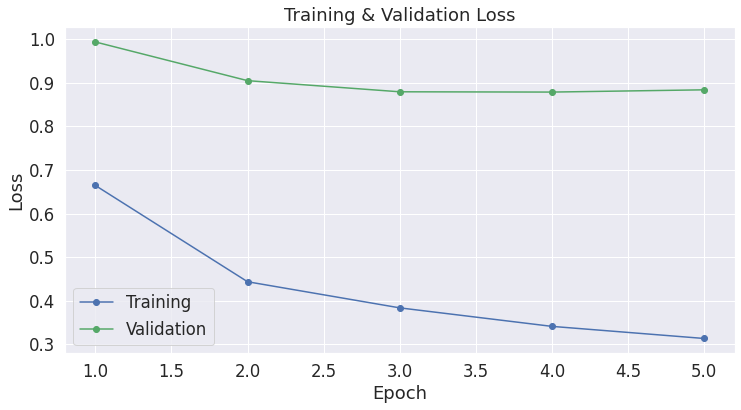

In [51]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Download the Data

In [52]:
#Save the Test Data in drive
used_test_df =pd.DataFrame(dataset_clean['test'])
used_test_df.to_csv(used_test_data_path, encoding='utf-8', index=False)
print("\nSaved Test Data")


Saved Test Data


In [53]:
#Save the Encoded Test Data in Drive 
encoded_test = pd.DataFrame(encoded_dataset['test'])
encoded_test.to_csv(encoded_test_data_path , encoding='utf-8', index=False)
print("\nSaved Encoded Test Data")


Saved Encoded Test Data


In [ ]:
#Save the label2id_df in Drive 
label2id_df = pd.DataFrame([label2id] )
label2id_df.to_csv(label2id_df_path  , encoding='utf-8', index=False) 
print("\nSaved label2id_df")

In [ ]:
#Save the best model in Drive 
shutil.copy('/content/best_model/best_model.pt', saved_path + 'best_model.pt' )
print("\nSaved Best Model")